## Model Test with Random Samples

In [1]:
# Import the required libarary
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
# Load the saved model
models = load_model(parent_dir+"/models/vgg16_model.keras")


In [4]:
#Load the test data
random_samples_to_test_model_dir = parent_dir+'/datasets/random_samples_to_test_model/'

In [5]:
# Please find the details below : 

result = [] # Create Empty list to save predictions
for i, filename in enumerate(os.listdir(random_samples_to_test_model_dir)):
    img_path = os.path.join(random_samples_to_test_model_dir, filename) # read Image path from directory
    image_batch = tf.keras.preprocessing.image.load_img(img_path , target_size=(160, 160))  # load the image with compatible size which we used while creating model
    image_array = img_to_array(image_batch) # convert image into array
    image_array = tf.expand_dims(image_array, axis=0) # convert one image array into batch
    preprocess_input = tf.keras.applications.vgg16.preprocess_input(image_array) # process it with vgg16 processcer
    predictions = models.predict_on_batch(preprocess_input).flatten() # predict the out on proceesed image
    predictions = tf.nn.sigmoid(predictions) # applied sigmoid as the result is in between -1 and 1
    predictions = tf.where(predictions<0.5,0,1) # categorized in 0 and 1
    result.append(predictions.numpy()) # append predictions
          

In [6]:
class_name = ['defective','good']

In [7]:
numberOfFiles = len(os.listdir(random_samples_to_test_model_dir))

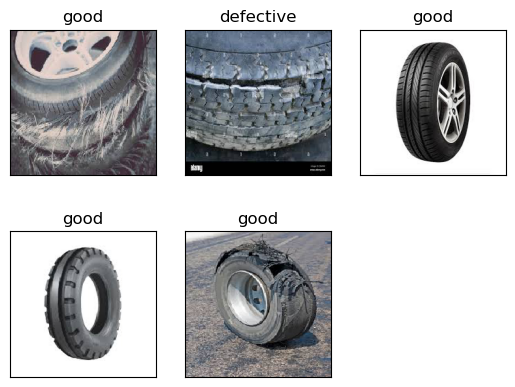

In [8]:
#plot the images with prediction
for i, filename in enumerate(os.listdir(random_samples_to_test_model_dir)):
    img_path = os.path.join(random_samples_to_test_model_dir, filename)
    img = image.load_img(img_path, target_size=(224, 224))  
    ax = plt.subplot(numberOfFiles//2,numberOfFiles-(numberOfFiles//2),i+1)
    ax.imshow(img)
    plt.title(class_name[result[i].item()]) 
    plt.xticks([])
    plt.yticks([])


